
Digit Classification Problem



In [3]:
mkdir digit_recognition

In [4]:
!pwd


/content


In [5]:
!cd digit_recognition
#digit classification sup/unsup learning?

In [ ]:
from google.colab import files
files.upload()

{}

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential #to stack layers one-after-other
from keras.layers import Dense #size,type of layer
from keras.layers import Flatten #converts 2D to 1D
from keras.datasets import mnist 
from keras.layers.convolutional import Conv2D #to put convolution layer
from keras.layers.convolutional import MaxPooling2D #to reduce dimensionality
from keras.utils import np_utils
import itertools


In [7]:
#load data
(x_train,y_train),(x_test,y_test)= mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


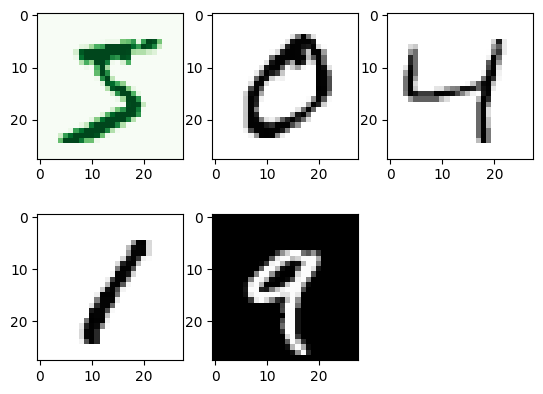

In [8]:
#plot images
plt.subplot(231)
plt.imshow(x_train[0], plt.get_cmap('Greens'))
plt.subplot(232)
plt.imshow(x_train[1], plt.get_cmap('Greys'))
plt.subplot(233)
plt.imshow(x_train[2], plt.get_cmap('Greys'))
plt.subplot(234)
plt.imshow(x_train[3], plt.get_cmap('Greys'))
plt.subplot(235)
plt.imshow(x_train[4], plt.get_cmap('gray'))
plt.show()


In [9]:
#model
model=Sequential()
model.add(Conv2D(32,(5,5),input_shape=(28,28,1),activation='relu')) #Conv2D(#filters,sizefilter,inpshape,activation)
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu')) #hidden layer
model.add(Dense(10,activation='softmax')) #possible 10 outputs thus 10 units
#compile
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#loss is categorical_crossentropy since more than 2 outputs

In [10]:
#reshape & resize
xm_train=x_train.reshape((x_train.shape[0],28,28,1)).astype('float32')
xm_test=x_test.reshape((x_test.shape[0],28,28,1)).astype('float32')
xm_train=xm_train/255
xm_test/=255.0

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
xm_train.shape #one additional column to match input shape

(60000, 28, 28, 1)

In [13]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [14]:
ym_train=(np_utils.to_categorical(y_train)) #convert y to categorical input 
ym_test=(np_utils.to_categorical(y_test))


In [15]:
history=model.fit(xm_train,ym_train,validation_data=(xm_test,ym_test),epochs=7,batch_size=200)
#validation data called by system after each epoch to crossverify
#test data at last only
#in each epoch 200*300= 60000 images 


Epoch 1/7
300/300 [==============================] - 40s 124ms/step - loss: 0.2290 - accuracy: 0.9371 - val_loss: 0.0683 - val_accuracy: 0.9796
Epoch 2/7
300/300 [==============================] - 34s 115ms/step - loss: 0.0627 - accuracy: 0.9813 - val_loss: 0.0599 - val_accuracy: 0.9802
Epoch 3/7
300/300 [==============================] - 37s 122ms/step - loss: 0.0431 - accuracy: 0.9870 - val_loss: 0.0445 - val_accuracy: 0.9856
Epoch 4/7
300/300 [==============================] - 37s 123ms/step - loss: 0.0334 - accuracy: 0.9901 - val_loss: 0.0409 - val_accuracy: 0.9862
Epoch 5/7
300/300 [==============================] - 35s 117ms/step - loss: 0.0266 - accuracy: 0.9917 - val_loss: 0.0400 - val_accuracy: 0.9875
Epoch 6/7
300/300 [==============================] - 35s 117ms/step - loss: 0.0207 - accuracy: 0.9937 - val_loss: 0.0336 - val_accuracy: 0.9895
Epoch 7/7
300/300 [==============================] - 36s 121ms/step - loss: 0.0168 - accuracy: 0.9949 - val_loss: 0.0312 - val_accuracy:

In [17]:
scores=model.evaluate(x_test[:0],y_test)
scores

ValueError: ignored

In [18]:
R1=model.predict(x_test[:])

313/313 [==============================] - 2s 7ms/step


In [19]:
R1

array([[0.        , 0.        , 0.        , ..., 0.99999994, 0.        ,
        0.        ],
       [0.        , 0.        , 0.99999994, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [20]:
R2=R1.max(1)
R3=np.argmax(R1,axis=1)#predicted values

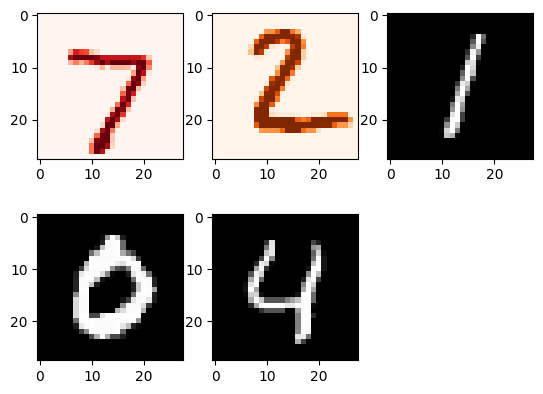

In [21]:
plt.subplot(231)
plt.imshow(x_test[0],cmap=plt.get_cmap('Reds'))
plt.subplot(232)
plt.imshow(x_test[1],cmap=plt.get_cmap('Oranges'))
plt.subplot(233)
plt.imshow(x_test[2],cmap=plt.get_cmap('gray'))
plt.subplot(234)
plt.imshow(x_test[3],cmap=plt.get_cmap('gray'))
plt.subplot(235)
plt.imshow(x_test[4],cmap=plt.get_cmap('gray'))


In [22]:
print(R3)

[7 2 1 ... 4 5 6]


In [23]:
!pip install sklearn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=342b412576cac4c4323cb4b09afa557853d972e96cc5fd176a8504e711138c69
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


In [24]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix


In [26]:
class_names=['0','1','2','3','4','5','6','7','8','9']
class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [27]:
def prnt_confusion_matrix(cm,class_names,title="Confusion_matrix",cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [28]:
cnf=confusion_matrix(y_test,R1)
np.set_printoptions(precision=2)
# plot normalized confusion matrix
plt.figure()
prnt_confusion_matrix(cnf, class_names=["0","1","2","3","4","5","6","7","8","9"], title='Normalized confusion matrix')
plt.show()

ValueError: ignored

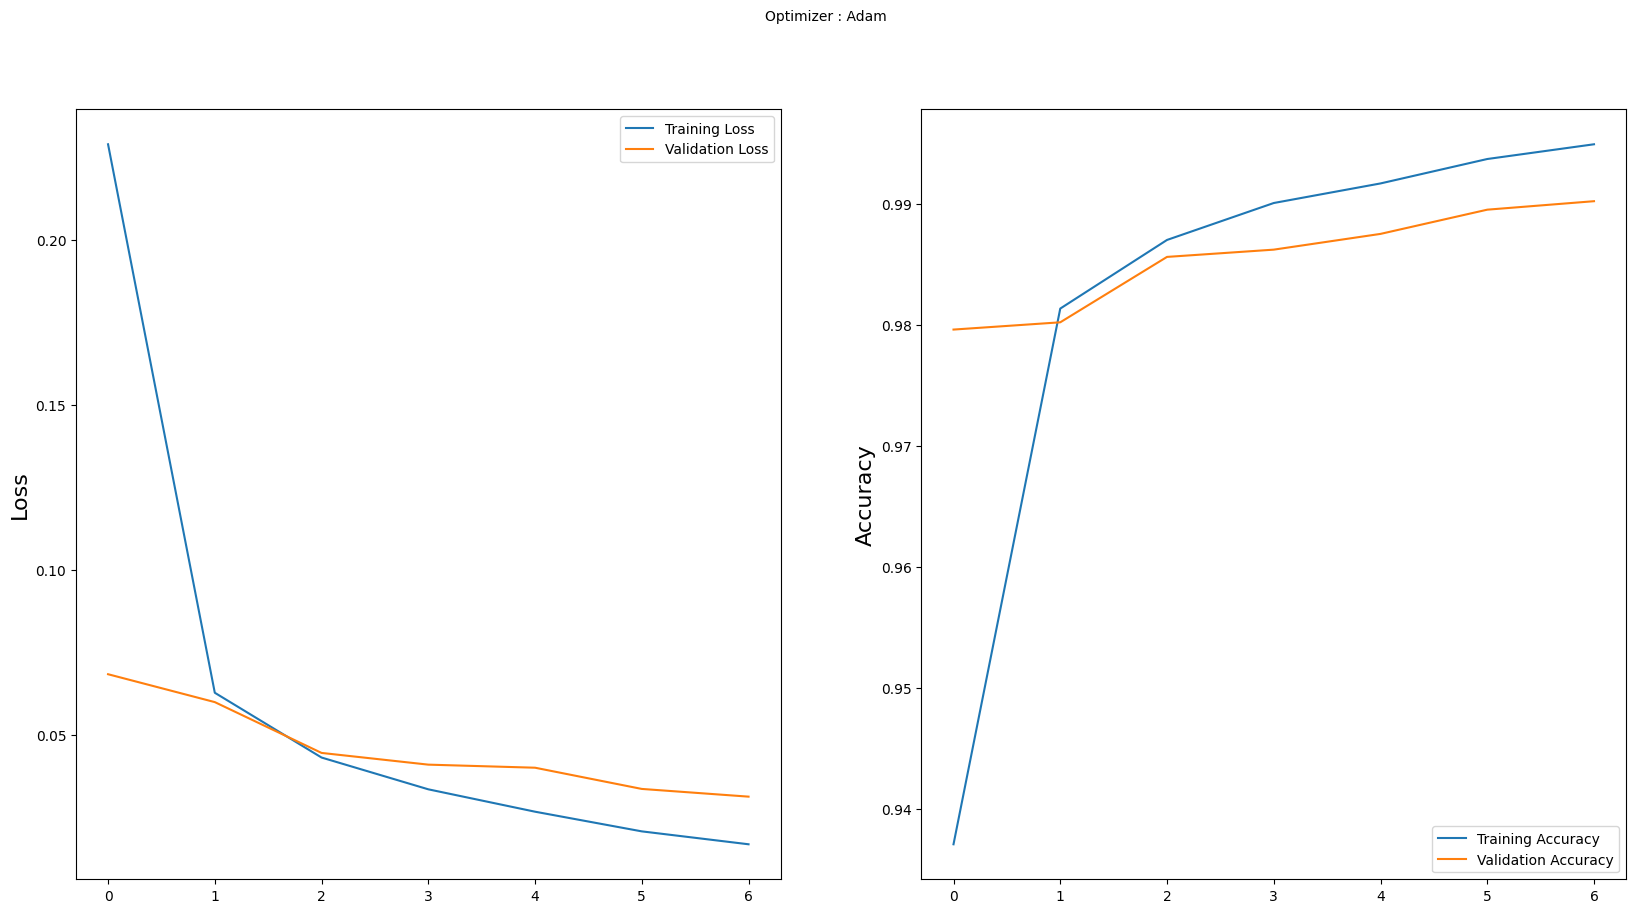

In [29]:
#Model evaluate
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()